<a href="https://colab.research.google.com/github/Rohmaned/project-sales-analyst/blob/main/Tugas%20project%20Revou/Analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If you have the data in CSV format, you can use:
# df = pd.read_csv('sales_data.csv')

# For Google Sheets (you'll need to install gspread and oauth2client)
# import gspread
# from oauth2client.service_account import ServiceAccountCredentials

# scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/drive']
# creds = ServiceAccountCredentials.from_json_keyfile_name("your_creds.json", scope)
# client = gspread.authorize(creds)
# sheet = client.open("Sales Data").sheet1
# data = sheet.get_all_records()
# df = pd.DataFrame(data)

# For this example, I'll create a sample dataframe
data = {
    'ORDERNUMBER': [10107, 10121, 10134, 10145, 10159],
    'QUANTITYORDERED': [30, 34, 41, 45, 24],
    'PRICEEACH': [95.7, 81.35, 94.74, 83.26, 72.85],
    'ORDERDATE': ['2/24/2023', '5/7/2023', '7/1/2023', '8/25/2023', '10/12/2023'],
    'STATUS': ['Shipped', 'Shipped', 'Shipped', 'Cancelled', 'Shipped'],
    'PRODUCTLINE': ['Motorcycles', 'Classic Cars', 'Vintage Cars', 'Trucks and Buses', 'Motorcycles'],
    'PRODUCTCODE': ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757'],
    'CUSTOMERNAME': ['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers', 'Corporate Gift Ideas Co.', 'Technics Stores Inc.'],
    'CITY': ['NYC', 'Reims', 'Lyon', 'San Francisco', 'Burlingame'],
    'DEALSIZE': ['Large', 'Medium', 'Small', 'Medium', 'Small']
}

df = pd.DataFrame(data)

# Calculate total sales
df['TOTAL_SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

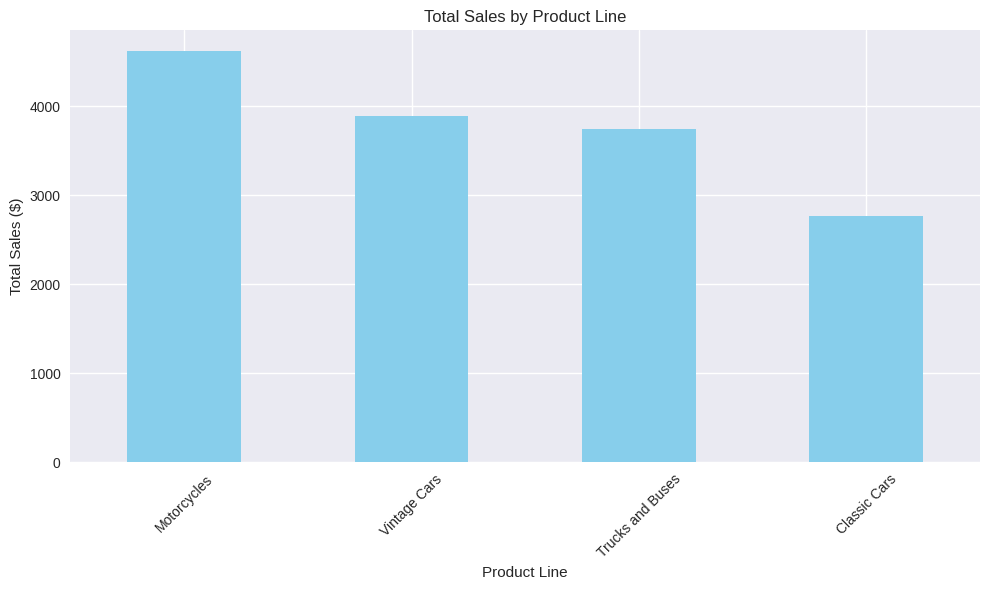

In [ ]:
# Group by product line and calculate total sales
product_sales = df.groupby('PRODUCTLINE')['TOTAL_SALES'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

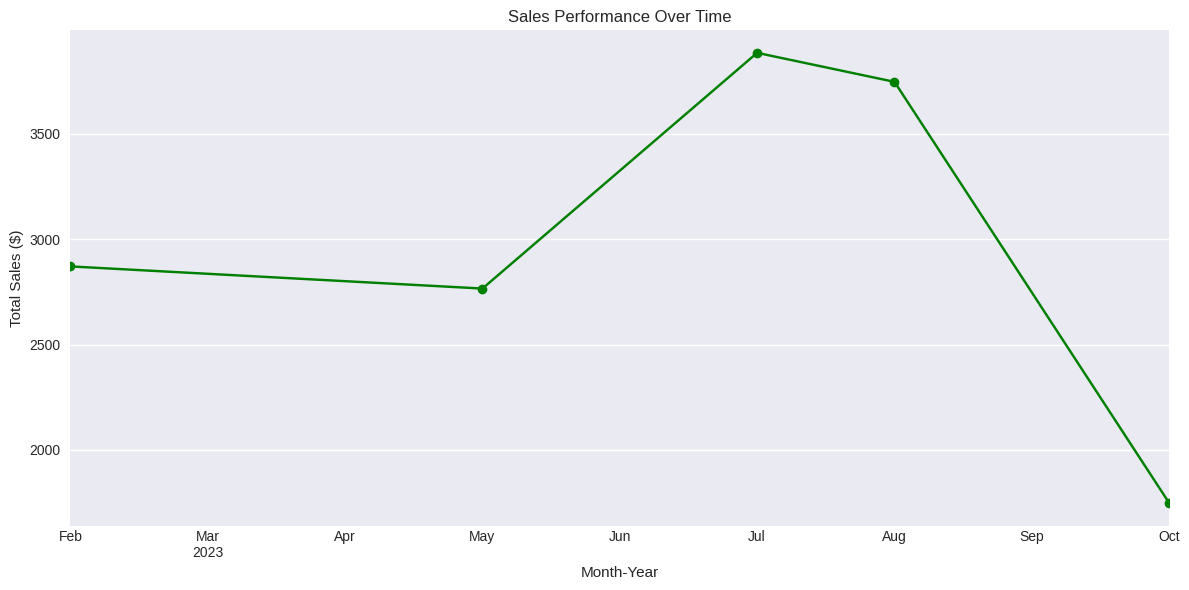

In [ ]:
# Convert order date to datetime and extract month/year
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['MONTH_YEAR'] = df['ORDERDATE'].dt.to_period('M')

# Group by month and calculate sales
time_sales = df.groupby('MONTH_YEAR')['TOTAL_SALES'].sum()

# Plot
plt.figure(figsize=(12,6))
time_sales.plot(kind='line', marker='o', color='green')
plt.title('Sales Performance Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

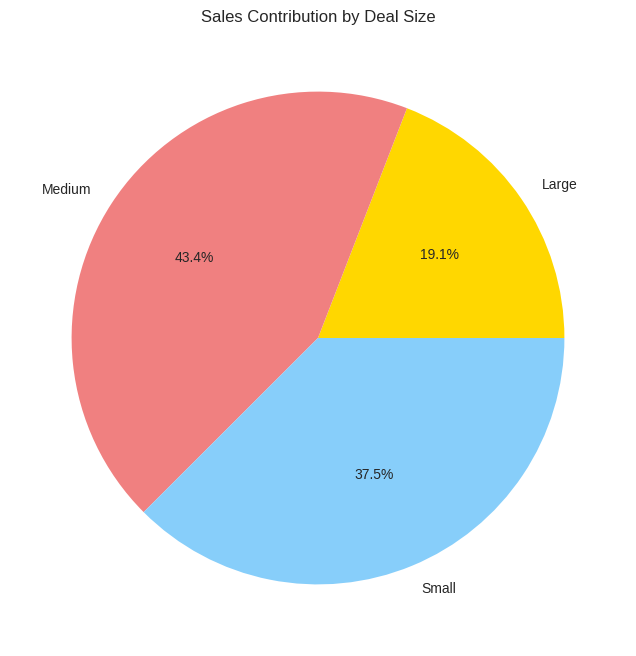

In [ ]:
# Group by deal size and calculate total sales and percentage
deal_size = df.groupby('DEALSIZE')['TOTAL_SALES'].agg(['sum', 'count'])
deal_size['percentage'] = (deal_size['sum'] / deal_size['sum'].sum()) * 100

# Plot
plt.figure(figsize=(8,8))
plt.pie(deal_size['sum'], labels=deal_size.index, autopct='%1.1f%%',
        colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Sales Contribution by Deal Size')
plt.show()